$  % These are commands to simply writing vectors in bold. 
   \newcommand{\RR}{\mathbb{R}}
   \newcommand{\R}{\mathbb{R}}
   \newcommand{\B}[2][\varepsilon]{ B_{#1} \left( #2 \right) }
   \newcommand{\vec}[1]{ \boldsymbol{\mathbf{#1}} }
   \newcommand{\Z}{\mathbb{Z}}
   \newcommand{\C}{\mathbb{C}}
   \newcommand{\tr}[1]{\mathrm{tr}\left( #1 \right)}
   \newcommand{\ran}{\mathrm{ran}}
   \newcommand{\MC}[1]{\mathcal{M}_{#1}\left(\mathbb{C}\right)}
   \newcommand{\MR}[1]{\mathcal{M}_{#1}\left(\mathbb{R}\right)}
   \newcommand{\bkt}[1]{\left\langle #1 \right\rangle}
   \newcommand{\brc}[1]{\left\lbrace #1 \right\rbrace}
   \newcommand{\set}[2]{\left\lbrace #1 \middle\vert #2 \right\rbrace}
   \newcommand{\sfrac}[2]{\mathstrut^{#1}/_{#2}}
   \newcommand{\ra}{\rightarrow}
   \newcommand{\hip}[2]{\left\langle {#1},{#2} \right\rangle}
   \newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
   \newcommand{\hnorm}[1]{\left\Vert {#1} \right\Vert_2}
   \DeclareMathOperator*{\argmax}{argmax} % thin space, limits underneath in displays
   \DeclareMathOperator*{\argmin}{argmin} % no space, limits underneath in displays
$    

<h1 align = 'center'> Fall 2023: Operations Research - Applications</h1>

<h2 align = 'center'> Noah Borquaye</h2>

<p>&nbsp;</p>







<h4> Network Flow -  MerryPines Transportation Problem:</h4> You own 2 tree farms which must supply Christmas trees to retailers in each of the 3 Tri-cities (and also Greenville). The cost - in dollars per tree - to ship from farm $i$ to location $j$ is given by the metrix below:


$$\begin{array}{|c|cccc|} \hline
 Farms \backslash Retailers & JC & KP & BR & GR\\ \hline
MerryPines &  1 &  7 & 4 & 5  \\ 
SantaTrees &  2 & 3 & 1 & 9  \\\hline
\end{array}
$$

MerryPines can supply 1,000 trees this year, while SantaTrees can supply supply 600. Each of these retailers is requesting 400 trees. Goal is to minimize total cost. Also, obtain the dual program and the shadow prices for the supplies/requirements. Interpret the shadow prices and also draw the spanning trees corresponding to the optimal basis. 

\
__Solution__

First, we import the necessary libraries


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
# use SVG as backend
%config InlineBackend.figure_format = 'svg'

import numpy as np

import pandas as pd
import networkx as nx

from matplotlib import MatplotlibDeprecationWarning
import warnings 
warnings.filterwarnings("ignore",category=MatplotlibDeprecationWarning)




The cost-in dollars per tree to ship from farm _i_
to location _j_ is given by the matrix below :


$$\begin{array}{|c|cccc|} \hline
 Farms \backslash Retailers & JC & KP & BR & GR\\ \hline
MerryPines &  1 &  7 & 4 & 5  \\ 
SantaTrees &  2 & 3 & 1 & 9  \\\hline
\end{array}
$$

Given that 

__1.__ MerryPines can supply 1,000 trees this year, while SantaTrees can supply
600.

__2.__ Each of these retailers is requesting 400 trees. 

Our Goal is to __minimize__ total cost. 


Let $x_{ij}$= number of trees to ship from farm $i$ to location $j$.\
$ \quad a_i$ = number of units available at source $i$ \
$\quad b_j$ = number of units required at destination\ 
$\quad c_{ij}$ = unit transportation cost from source $i$ to destination $j$\
$\quad (i = 1, 2, . . . , m; j = 1, 2, . . . , n).$


Then the __Primal__ of the linear program is


$$maximize \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij} $$

$$
\begin{array}{ll}
subject \; to \; & \sum_{j=1}^nx_{ij} = a_i\\
\; & \sum_{i=1}^m (-x_{ij}) = -b_j ,  \\ 
\; & x_{ij} \geq 0, \quad (i = 1, 2, . . . , m), (j = 1, 2, . . . , n)\\ 
\end{array}
$$


\\

$$ \quad minimize \quad\quad x_{11} + 7x_{12} +4x_{13} + 5x_{14} + 2x_{21} + 3x_{22} + x_{23} + 9x_{24} $$

$$\begin{array}{lrl}
subject \; to & M: & x_{11} & + 7x_{12} &+ 4x_{13} &+ 5x_{14} & = 1000  \\ 
              & S: & 2x_{21} & + 3x_{22} &+ x_{23}& + 9x_{24} & = 600  \\ 
subject \; to & JC: & -x_{11} &- 2x_{21}  &&& = - 400  \\ 
              & KP: & -7x{12} &- 3x_{22}  && &   =- 400  \\ 
              & BR: & -4x{13} &- x_{23}   && &  = - 400 \\
              & GR: & -5x{14} &- 9x_{24}  &&&  = - 400 \\
\end{array}\\
\; \;\;x_{ij} \geq 0 \quad (i=1,2; j=1,2,3,4).
$$




The corresponding __Dual program__ is


$$
\begin{aligned}
\text{Maximize} \quad & \sum_{i=1 }^ma_i \lambda_i  - \sum_{j=1}^n b_j \mu_j \\
\text{Subject to} \quad & \lambda_i - \mu_j \leq c_{ij} \quad \forall i,j  \\
& x_{ij}\geq 0\quad \lambda_i \geq 0,\quad \mu_j \geq 0.\\
\end{aligned}
$$

$\lambda_i:$ This dual variable is associated with the supply constraints of the primal problem. It represents the marginal cost of increasing the supply at source $i.$

$\mu_j:$ This dual variable is associated with the requirement constraints of the primal problem. It represents the marginal cost of increasing the demand at destination $j.$


Now,
lets define the nodes and edges in the network as:\
__- Nodes:__ MerryPines (M), SantaTrees (S), JC , KP , BR , GR \
__- Edges:__ Edges will represent the transportation routes from farm to retailers.


In [58]:
# Solving the LP using GLPK

%%script glpsol -m /dev/stdin -o /dev/stdout

set FARMS;
set RETAILERS;

param SOURCES {FARMS}   >= 0;
param REQUIREMENTS {RETAILERS} >= 0;
param COSTS {FARMS,RETAILERS} default 1600;

var x {FARMS,RETAILERS} >= 0;

/* Minimize total tree transfer costs */
minimize TOTALCOST: sum{f in FARMS, r in RETAILERS} COSTS[f,r]*x[f,r];

/* Total shipped from each source must be less than source capacity */
s.t. SHIPPED {f in FARMS}: sum {r in RETAILERS} x[f,r] = SOURCES[f];

/*  Total received must equal total shipped */
s.t. REQUIRED {r in RETAILERS}: sum {f in FARMS} x[f,r] = REQUIREMENTS[r];

solve;

table tout {f in FARMS, r in RETAILERS} OUT "CSV" "EdgeWeights.csv" :
f, r, x[f,r];



data;

/* 
The following data details supply, demand, and
shipping costs from 2 farms to 3 retailers
in the Tricities region of Tennessee and Greenville
*/

param: FARMS: SOURCES :=
        M       1000   #MerryPines     
        S       600;
    
   
   
param: RETAILERS: REQUIREMENTS :=
    JC                          400
    KP                          400       
    BR                          400
    GR                          400  ;

param COSTS :     JC   KP  BR  GR :=
              M    1   7   4   5
              S    2   3   1   9;
    
end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin -o /dev/stdout
Reading model section from /dev/stdin...
Reading data section from /dev/stdin...
51 lines were read
Generating TOTALCOST...
Generating SHIPPED...
Generating REQUIRED...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
7 rows, 8 columns, 24 non-zeros
Preprocessing...
6 rows, 8 columns, 16 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5
      0: obj =   2.000000000e+03 inf =   6.000e+02 (1)
      2: obj =   4.800000000e+03 inf =   0.000e+00 (0)
*     3: obj =   4.600000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (126736 bytes)
Writing tout...
Model has been successfully processed
Writing basic solution to '/dev/stdout'...
Problem:    stdin
Rows:       7
Columns:    8
Non-zero



From the solution output,the total minimum cost to ship all 1600 trees from both farms to the retailers is $\$ 4600$.

In [59]:
# THE DUAL PROGRAM

# pip install pulp

from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Define sets and parameters
FARMS = ["M", "S"]
RETAILERS = ["JC", "KP", "BR", "GR"]

SOURCES = {"M": 1000, "S": 600}
REQUIREMENTS = {"JC": 400, "KP": 400, "BR": 400, "GR": 400}

COSTS = {
    "M": {"JC": 1, "KP": 7, "BR": 4, "GR": 5},
    "S": {"JC": 2, "KP": 3, "BR": 1, "GR": 9},
}

# Create the dual LP problem
dual_problem = LpProblem(name="Dual_Transportation_Problem", sense=LpMaximize)

# Define dual variables
lambda_vars = {farm: LpVariable(name=f"lambda_{farm}", lowBound=0) for farm in FARMS}
mu_vars = {retailer: LpVariable(name=f"mu_{retailer}", lowBound=0) for retailer in RETAILERS}

# Define the objective function
dual_problem += lpSum(SOURCES[farm] * lambda_vars[farm] for farm in FARMS) - lpSum(
    REQUIREMENTS[retailer] * mu_vars[retailer] for retailer in RETAILERS
)

# Define constraints
for farm in FARMS:
    for retailer in RETAILERS:
        dual_problem += lambda_vars[farm] - mu_vars[retailer] <= COSTS[farm][retailer]

# Solve the dual problem
dual_problem.solve()

# Display results
print(f"Objective Value (Optimal Solution): {dual_problem.objective.value()}")
print("\nDual Variables:")
for farm in FARMS:
    print(f"{lambda_vars[farm].name}: {lambda_vars[farm].value()}")

for retailer in RETAILERS:
    print(f"{mu_vars[retailer].name}: {mu_vars[retailer].value()}")

Objective Value (Optimal Solution): 4600.0

Dual Variables:
lambda_M: 6.0
lambda_S: 3.0
mu_JC: 5.0
mu_KP: 0.0
mu_BR: 2.0
mu_GR: 1.0


From the output of the dual program, 


- $\lambda_M: 6.0-  $ For every additional unit of supply from farm M (MerryPines), the total cost will increase by $\$6.$

- $\lambda_S: 3.0 -$ For every additional unit of supply from farm S (SantaTrees), the total cost will increase by $\$3.$


- $\mu_{JC}:5.0-$ For every additional unit of demand from retailer in Johnson City (JC), the total cost will decrease by $\$5.$ 

- $\mu_{KP}:0.0-$ Every additional unit of demand from retailer in Kingsport (KP) will not change the total cost.


- $\mu_{BR}:2.0-$ For every additional unit of demand from retailer in Bristol (BR), the total cost will increase by $\$2.$. 


- $\mu_{GR}:5.0-$ For every additional unit of demand from retailer in Greenville (GR), the total cost will increase by $\$1.$. 



In [41]:
def DirectedDraw(G, pos = None, ax = None, 
                 with_node_labels = True, 
                 edge_color = 'black',
                 edge_labels = None, 
                 **kwargs):
    """Keyword Arguments destinations
       ==============================
       edge_color ==>  to nx.draw_networkx_edges 
       All other optional keyword arguments (kwargs) are passed to 
       networkx.draw_networkx_nodes (edges cannot be modified )"""
    UniDirectional = []
    BiDirectional = []
    for edge in G.edges:
        if( G.has_edge( edge[1],edge[0])):
            BiDirectional.append(edge)
        else:
            UniDirectional.append(edge)
    if( pos == None):
        pos = nx.layout.random_layout(G)
    if( ax == None):
        ax = plt.gca()
    ax.axis('off')
    nx.draw_networkx_edges(G,pos, edgelist = UniDirectional, ax = ax, edge_color = edge_color)
    nx.draw_networkx_edges(G,pos, edgelist = BiDirectional, connectionstyle='arc3,rad=0.1', 
                           edge_color = edge_color, ax = ax)
    nx.draw_networkx_nodes(G,pos, ax = ax, **kwargs )
    if( with_node_labels):
        nx.draw_networkx_labels(G,pos, ax = ax )
    if( edge_labels):
        Edges = dict()
        for edge in G.edges:
            Edges[edge] = G.edges[edge][edge_labels]

        if(len(UniDirectional) > 0):
            nx.draw_networkx_edge_labels(G,pos,{ed:Edges[ed] for ed in Edges if ed in UniDirectional}, 
                                         label_pos = 0.5, ax = ax);
        if(len(BiDirectional) > 0):
            yhi = []
            ylo = []
            for bi in BiDirectional:
                if( pos[bi[0]][1] > pos[bi[1]][1] ):
                    yhi.append(bi)
                elif( pos[bi[0]][1] == pos[bi[1]][1] and pos[bi[0]][0] >= pos[bi[1]][0] ):
                    yhi.append(bi)
                else:
                    ylo.append(bi)
            nx.draw_networkx_edge_labels(G,pos,{ed:Edges[ed] for ed in Edges if ed in yhi}, 
                                         verticalalignment='top', label_pos = 0.25, ax = ax);
            nx.draw_networkx_edge_labels(G,pos,{ed:Edges[ed] for ed in Edges if ed in ylo}, 
                                         verticalalignment='bottom', label_pos = 0.25, ax = ax);

    return ax

In [43]:
CostsDf = pd.DataFrame( np.array([[1,7,4,5],
                                [2,3, 1, 9]]),
                      columns = ['JC','KP','BR','GR'],
                      index = ['M','S'])
CostsDf

,JC,KP,BR,GR
M,1,7,4,5
S,2,3,1,9


In [45]:
G = nx.DiGraph()
G.add_edges_from(nx.bipartite.complete_bipartite_graph(2, 4).edges)
G = nx.relabel_nodes(G, {0: 'M', 1: 'S', 2: 'JC', 3: 'KP', 4: 'BR', 5: 'GR'})

for edge in G.edges:
    u,v = edge
    G[u][v]['weight'] = CostsDf.loc[u,v] 



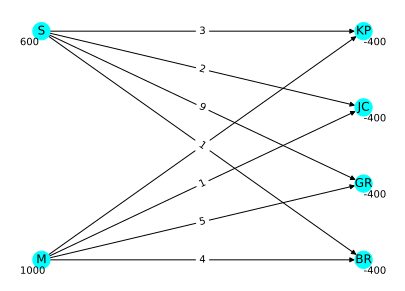

In [47]:


fig,ax = plt.subplots(figsize = (7,5))
pos = nx.bipartite_layout(G,['M','S'])
DirectedDraw(G,pos, ax = ax, node_color = 'cyan', edge_labels = 'weight');

#Assign the Capacities
values = {'M': 1000, 'S': 600, 'JC': -400, 'KP': -400, 'BR': -400, 'GR': -400}


# Shift the positions of 'M' and 'S' to the left
pos['M'] = (pos['M'][0] - 0.1, pos['M'][1])
pos['S'] = (pos['S'][0] - 0.1, pos['S'][1])

node_labels = nx.get_node_attributes(G, 'value')

for node, (x, y) in pos.items():
    ax.text(x, y, f" \n \n{values[node]}", verticalalignment='center', horizontalalignment='left', fontsize=10)
#plt.show()


In [49]:
ShipResultsDf = pd.read_csv('EdgeWeights.csv')
ShipResultsDf.index = [
    'edge%d' % (i+1) for i in range(len(ShipResultsDf))]
ShipResultsDf

,f,r,x
edge1,M,JC,400
edge2,M,KP,0
edge3,M,BR,200
edge4,M,GR,400
edge5,S,JC,0
edge6,S,KP,400
edge7,S,BR,200
edge8,S,GR,0


In [51]:
ShipResultsDf[ ShipResultsDf.x > 0] 

,f,r,x
edge1,M,JC,400
edge3,M,BR,200
edge4,M,GR,400
edge6,S,KP,400
edge7,S,BR,200


In [53]:
SpanningTree = ShipResultsDf[ShipResultsDf.x > 0].values[:,:-1]
SpanningTree.tolist()

[['M', 'JC'], ['M', 'BR'], ['M', 'GR'], ['S', 'KP'], ['S', 'BR']]

In [56]:
# Sample graph data
G = nx.DiGraph()  # Use DiGraph for a directed graph
G.add_nodes_from(['M', 'S'], bipartite=0)
G.add_edges_from(SpanningTree.tolist())


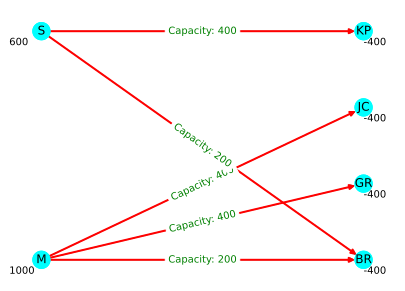

In [58]:
fig,ax = plt.subplots(figsize = (7,5))
pos = nx.bipartite_layout(G,['M','S'])
ub = nx.draw_networkx_nodes(G, pos, node_color='cyan', ax=ax)
DirectedDraw(G, pos, node_color='cyan', edge_color='grey', ax=ax)

nx.draw_networkx_edges(G,pos, edgelist= SpanningTree.tolist(), edge_color = 'red', width = 2,ax = ax);



capacities = ShipResultsDf.set_index(['f', 'r']).to_dict()['x']

# Draw capacities in the middle of each edge
edge_labels = {(f, r): f"Capacity: {capacities.get((f, r), 0)}" for f, r in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')


# Shift the positions of 'M' and 'S' to the left
pos['M'] = (pos['M'][0] - 0.15, pos['M'][1])
pos['S'] = (pos['S'][0] - 0.15, pos['S'][1])

for node, (x, y) in pos.items():
    ax.text(x, y, f" \n \n{values[node]}", verticalalignment='center', horizontalalignment='left', fontsize=10)
    

plt.show()
    
    




Thus, in order to achieve the minimum shipment cost of $\$4600,$ from the spanning tree, MerryPines must ship 200 trees to Bristol, 400 trees to Greenville, and 400 trees to Johnson City. Meanwhile, SantaTrees should also ship 200 trees to Bristol and 400 trees to Kingsport.